In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.signal

In [2]:
from astropy.io import fits
from Functions import *

In [3]:
hdul = fits.open("spec-0532-51993-0497.fits")
print(hdul[1].columns)

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


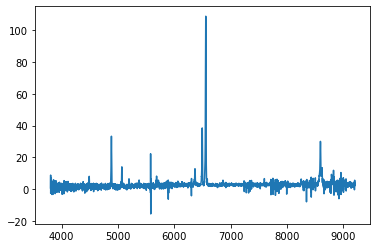

In [4]:
spec =  hdul[1].data['flux']
waves = 10**hdul[1].data['loglam']
plt.plot(waves, spec)

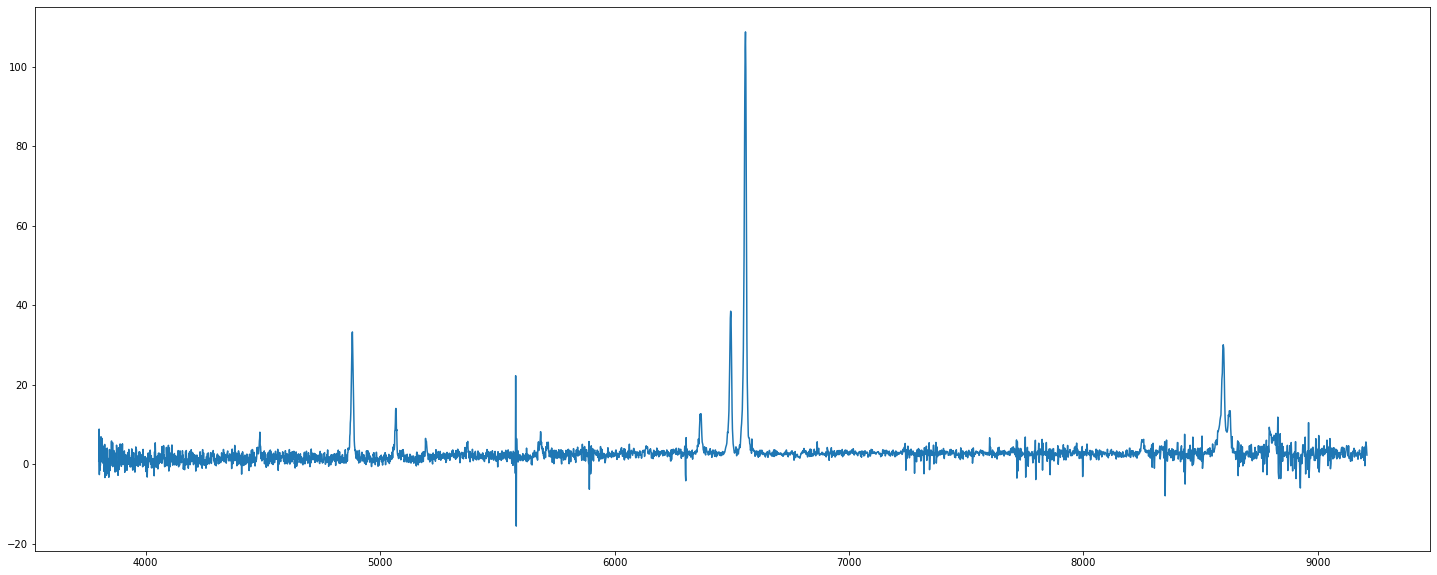

In [5]:
fig = plt.figure()
fig.set_size_inches(25,10)
plt.plot(waves, spec)
plt.show()

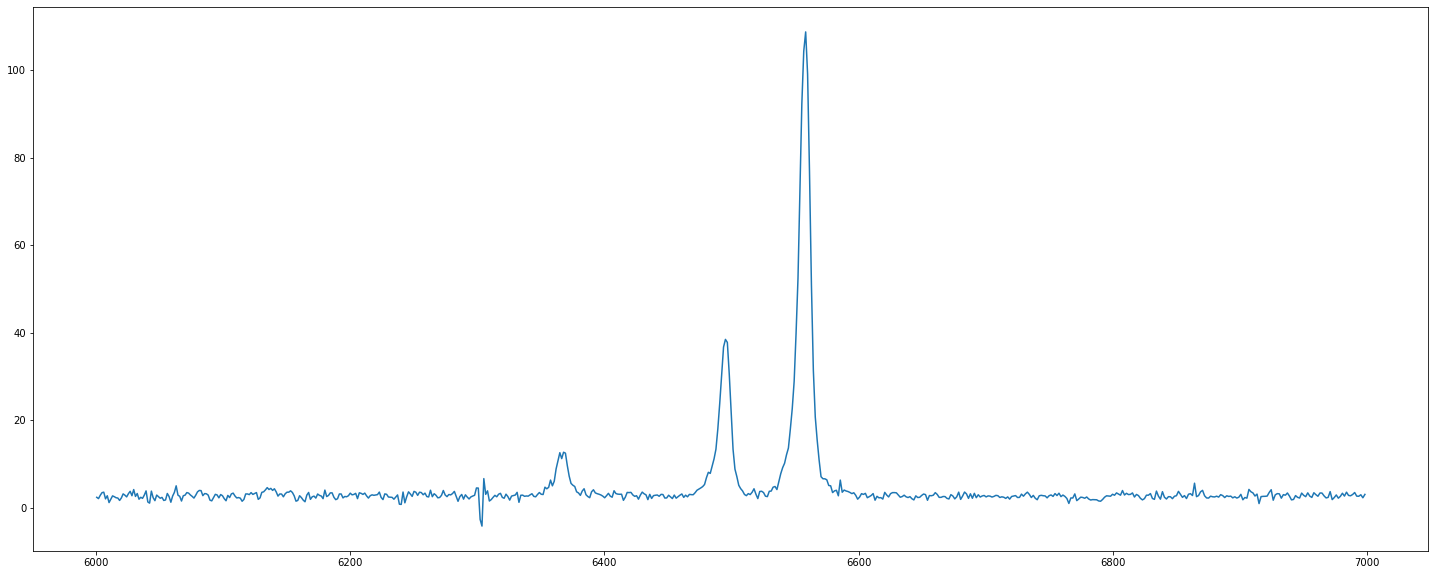

In [6]:
sub_i = np.where((waves > 6000) & (waves < 7000))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]
fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(sub_wave, sub_spec)
plt.show()

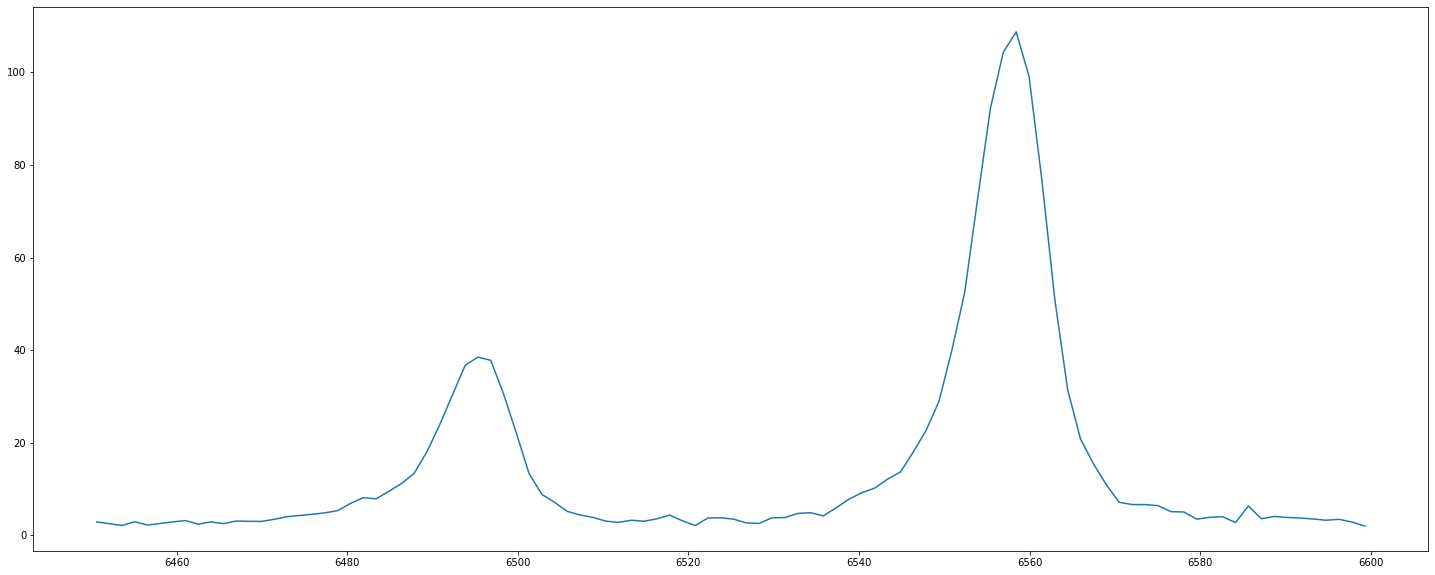

In [7]:
sub_i = np.where((waves > 6450) & (waves < 6600))
sub_spec = spec[sub_i]
sub_wave = waves[sub_i]
fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(sub_wave, sub_spec)
plt.show()

In [8]:
spec_peaks = scipy.signal.find_peaks(sub_spec, height = 35)[0]
print(sub_wave[spec_peaks])

[6495.31   6558.4336]


Performing a least square fit...
Printing out the best fitting parameters and 1 std errors...
-----------------------------------------
Line 1 Amp: 18.084801254862732 Amp_error: 0.7695012639598044

Line 2 Amp: 56.166931290486275 Amp_error: 1.4583963440479368

Line 1 Wavelength: 6494.9536618017255 Amp_error: 0.2265152746964372

Line 2 Wavelength: 6557.602978325114 Amp_error: 0.073282002950094

Line width: 0.22036551724781428 Sigma_err: 0.0035845112755643845

Continuum level: 4.454366274064296 Amp_error: 0.32001191533476514

Plotting the observered and modeled data...


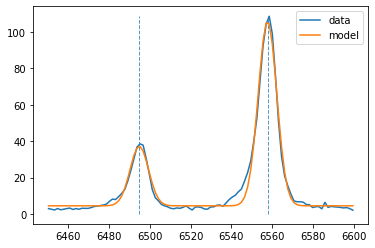

In [9]:

popt, pcov = fit_data(sub_wave, sub_spec, 400, 1200, *sub_wave[spec_peaks], 5.0, 4.0)

In [34]:
O3_4959_e = 4958.911
O3_5007_e = 5006.843
O3_4959_o = 6494.9536618017255
O3_5007_o = 6557.602978325114

src_redshift1 = str(get_redshift(6494.9536618017255, O3_4959_e))
print("The redshift of the galaxy is z = " + src_redshift1)

src_redshift2 = str(get_redshift(6557.602978325114, O3_5007_e))
print("The redshift of the galaxy is z = " + src_redshift2)


The redshift of the galaxy is z = 0.30975402902002586
The redshift of the galaxy is z = 0.30972810178492005
